<a href="https://colab.research.google.com/github/kmenesesrivera/codonusagebias/blob/main/4-Prueba_Codon_usage_KNN%26RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Attribute Information:

- Column 1: Kingdom
- Column 2: DNAtype
- Column 3: SpeciesID
- Column 4: Ncodons
- Column 5: SpeciesName
- Columns 6-69: codon (header: nucleotide bases; entries: frequency of usage (5 digit floating point number))

The 'Kingdom' is a 3-letter code corresponding to `xxx' in the CUTG database name: 'arc'(archaea), 'bct'(bacteria), 'phg'(bacteriophage), 'plm' (plasmid), 'pln' (plant), 'inv' (invertebrate), 'vrt' (vertebrate), 'mam' (mammal), 'rod' (rodent), 'pri' (primate), and 'vrl'(virus) sequence entries. Note that the CUTG database does not contain 'arc' and 'plm' (these have been manually curated ourselves).

The 'DNAtype' is denoted as an integer for the genomic composition in the species: 0-genomic, 1-mitochondrial, 2-chloroplast, 3-cyanelle, 4-plastid, 5-nucleomorph, 6-secondary_endosymbiont, 7-chromoplast, 8-leucoplast, 9-NA, 10-proplastid, 11-apicoplast, and 12-kinetoplast.

The species identifier ('SpeciesID') is an integer, which uniquely indicates the entries of an organism. It is an accession identifier for each different species in the original CUTG database, followed by the first item listed in each genome.

The number of codons (`Ncodons') is the algebraic sum of the numbers listed for the different codons in an entry of CUTG. Codon frequencies are normalized to the total codon count, hence the number of occurrences divided by 'Ncodons' is the codon frequencies listed in the data file.

The species' name ('SpeciesName') is represented in strings purged of `comma' (which are now replaced by `space'). This is a descriptive label of the name of the species for data interpretations.

Lastly, the codon frequencies ('codon') including 'UUU', 'UUA', 'UUG', 'CUU', etc., are recorded as floats (with decimals in 5 digits).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Cursos_PUCP/Curso_ML/Proyecto_Final
%ls

/content/drive/MyDrive/Cursos_PUCP/Curso_ML/Proyecto_Final
 Analisis_Codon.ipynb                'Multiclass ROC.png'
 codon_usage.csv                      Multiclass_ROC_RandonForest.png
 Multiclass_ROC_Kneiboard.png        'Multiclass_ROC_RandonForest y2.png'
'Multiclass_ROC_Kneiboard (y1).png'  'Untitled document.gdoc'


In [3]:
import pandas as pd
df = pd.read_csv('codon_usage.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(5)

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,CCA,CCG,UGG,GGU,GGC,GGA,GGG,UCU,UCC,UCA,UCG,AGU,AGC,ACU,ACC,ACA,ACG,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,0.00752,0.02506,0.01103,0.04110,0.00902,0.03308,0.01003,0.05013,0.01554,0.01103,0.02356,0.03208,0.01203,0.00501,0.01003,0.01203,0.03158,0.01905,0.02456,0.01353,0.02155,0.00251,0.00652,0.00150,0.01554,0.00501,0.02105,0.00902,0.01053,0.00501,0.02256,0.00301,0.03108,0.00401,0.02607,0.00251,0.01153,0.00501,0.02356,0.01053,0.03860,0.00401,0.00702,0.00401,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,0.00882,0.03324,0.00814,0.04071,0.00814,0.03256,0.01085,0.04885,0.01221,0.01357,0.00678,0.02714,0.01221,0.00407,0.01425,0.01221,0.01967,0.02239,0.01289,0.02103,0.01493,0.00407,0.00475,0.00068,0.02035,0.00950,0.02782,0.01425,0.00611,0.00475,0.02917,0.00407,0.02374,0.00882,0.02917,0.00271,0.01628,0.00204,0.01967,0.00543,0.03392,0.00136,0.00678,0.00136,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316,0.02180,0.01625,0.01872,0.01213,0.01070,0.02406,0.01234,0.01440,0.00514,0.01604,0.01460,0.02098,0.01070,0.01728,0.01851,0.00864,0.01172,0.01892,0.01933,0.01419,0.01296,0.00967,0.01337,0.01337,0.01851,0.01131,0.01419,0.01090,0.02612,0.01275,0.01522,0.02365,0.02962,0.01789,0.01625,0.01234,0.01604,0.01687,0.02077,0.03949,0.00864,0.00596,0.00926,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,0.02507,0.02924,0.02089,0.02141,0.01723,0.01932,0.02141,0.00679,0.02245,0.00522,0.01358,0.00418,0.01410,0.00574,0.01201,0.00992,0.00366,0.02402,0.02663,0.02872,0.00992,0.02350,0.00522,0.01619,0.00836,0.02037,0.01358,0.02089,0.00731,0.02141,0.00888,0.01567,0.01253,0.02298,0.01358,0.00992,0.00888,0.00783,0.00679,0.03133,0.04282,0.00627,0.00261,0.00261,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,0.01310,0.02773,0.02803,0.00508,0.00920,0.02965,0.02878,0.00574,0.01572,0.01577,0.01007,0.00508,0.00604,0.00679,0.01205,0.03127,0.00775,0.00959,0.00797,0.02006,0.00359,0.00933,0.01191,0.01616,0.00788,0.02593,0.00854,0.01200,0.02098,0.02089,0.01367,0.01502,0.01809,0.02738,0.01796,0.01082,0.00705,0.01174,0.00858,0.03408,0.03964,0.00950,0.00429,0.00578,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

In [6]:
# Se muestra el porcentaje de registros únicos por columna
print ('Columna', ':', 'dtypes',':', 'PorcentajeUnicos', ':', '#Unicos')
print ('--------------------------------------------------------')
for i in df.keys():
  print (i, ':', df[i].dtypes,':', df[i].nunique()/len(df),':', len(df[i].unique()))

Columna : dtypes : PorcentajeUnicos : #Unicos
--------------------------------------------------------
Kingdom : object : 0.0008443352778630641 : 11
DNAtype : int64 : 0.0008443352778630641 : 11
SpeciesID : int64 : 0.9493398833282162 : 12368
Ncodons : int64 : 0.5452103162419404 : 7103
SpeciesName : object : 0.9990789069696039 : 13016
UUU : object : 0.5217224439668406 : 6797
UUC : object : 0.45087503837887627 : 5874
UUA : float64 : 0.368130181148296 : 4796
UUG : float64 : 0.25191894381332514 : 3282
CUU : float64 : 0.28223825606386244 : 3677
CUC : float64 : 0.33688977586736263 : 4389
CUA : float64 : 0.3118667485416027 : 4063
CUG : float64 : 0.3501688670555726 : 4562
AUU : float64 : 0.4024408965305496 : 5243
AUC : float64 : 0.35953331286459933 : 4684
AUA : float64 : 0.3436444580902671 : 4477
AUG : float64 : 0.24846484494933987 : 3237
GUU : float64 : 0.27939821922014124 : 3640
GUC : float64 : 0.27648142462388703 : 3602
GUA : float64 : 0.24171016272643536 : 3149
GUG : float64 : 0.30649370586

In [7]:
def str2codenum(df):
  d_var = {}
  for i in df.keys():
    #print (i, df[i].dtypes, '-------------------->')
    if (df[i].dtypes == object) == True:
      d={}
      k=0
      for key in df[i].unique():
        df[i] = df[i].replace([key],k)
        d[k] = key
        k=k+1
      d_var[i] = (d)
  return df, d_var

In [8]:
df, d_var = str2codenum(df)

In [9]:
def rm_col(df, colnm):
  return df.drop(colnm, axis=1)
## ['Kingdom','DNAtype','SpeciesID','Ncodons','SpeciesName']
to_rm = ['SpeciesID','Ncodons','SpeciesName']
for col_nm in to_rm:
  df = rm_col(df, col_nm)

In [10]:
df.head(5)

,Kingdom,DNAtype,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,AUA,AUG,GUU,GUC,GUA,GUG,GCU,GCC,GCA,GCG,CCU,CCC,CCA,CCG,UGG,GGU,GGC,GGA,GGG,UCU,UCC,UCA,UCG,AGU,AGC,ACU,ACC,ACA,ACG,UAU,UAC,CAA,CAG,AAU,AAC,UGU,UGC,CAU,CAC,AAA,AAG,CGU,CGC,CGA,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,0,4293.0,3421.0,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,0.00551,0.02005,0.00752,0.02506,0.01103,0.04110,0.00902,0.03308,0.01003,0.05013,0.01554,0.01103,0.02356,0.03208,0.01203,0.00501,0.01003,0.01203,0.03158,0.01905,0.02456,0.01353,0.02155,0.00251,0.00652,0.00150,0.01554,0.00501,0.02105,0.00902,0.01053,0.00501,0.02256,0.00301,0.03108,0.00401,0.02607,0.00251,0.01153,0.00501,0.02356,0.01053,0.03860,0.00401,0.00702,0.00401,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,0,0,1.0,1.0,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,0.01153,0.02510,0.00882,0.03324,0.00814,0.04071,0.00814,0.03256,0.01085,0.04885,0.01221,0.01357,0.00678,0.02714,0.01221,0.00407,0.01425,0.01221,0.01967,0.02239,0.01289,0.02103,0.01493,0.00407,0.00475,0.00068,0.02035,0.00950,0.02782,0.01425,0.00611,0.00475,0.02917,0.00407,0.02374,0.00882,0.02917,0.00271,0.01628,0.00204,0.01967,0.00543,0.03392,0.00136,0.00678,0.00136,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,0,0,2.0,2.0,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,0.02283,0.01604,0.01316,0.02180,0.01625,0.01872,0.01213,0.01070,0.02406,0.01234,0.01440,0.00514,0.01604,0.01460,0.02098,0.01070,0.01728,0.01851,0.00864,0.01172,0.01892,0.01933,0.01419,0.01296,0.00967,0.01337,0.01337,0.01851,0.01131,0.01419,0.01090,0.02612,0.01275,0.01522,0.02365,0.02962,0.01789,0.01625,0.01234,0.01604,0.01687,0.02077,0.03949,0.00864,0.00596,0.00926,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,0,0,3.0,3.0,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,0.02402,0.02245,0.02507,0.02924,0.02089,0.02141,0.01723,0.01932,0.02141,0.00679,0.02245,0.00522,0.01358,0.00418,0.01410,0.00574,0.01201,0.00992,0.00366,0.02402,0.02663,0.02872,0.00992,0.02350,0.00522,0.01619,0.00836,0.02037,0.01358,0.02089,0.00731,0.02141,0.00888,0.01567,0.01253,0.02298,0.01358,0.00992,0.00888,0.00783,0.00679,0.03133,0.04282,0.00627,0.00261,0.00261,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,0,0,4.0,4.0,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,0.02716,0.00867,0.01310,0.02773,0.02803,0.00508,0.00920,0.02965,0.02878,0.00574,0.01572,0.01577,0.01007,0.00508,0.00604,0.00679,0.01205,0.03127,0.00775,0.00959,0.00797,0.02006,0.00359,0.00933,0.01191,0.01616,0.00788,0.02593,0.00854,0.01200,0.02098,0.02089,0.01367,0.01502,0.01809,0.02738,0.01796,0.01082,0.00705,0.01174,0.00858,0.03408,0.03964,0.00950,0.00429,0.00578,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [11]:
x = df.drop(["Kingdom","DNAtype"], axis=1)
y1 = df["Kingdom"] # Datos del Reyno animal
y2 = df["DNAtype"] # Datos del tipo de ADN

In [12]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.2, random_state=42)
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)

## Modelo N° 1: RandomForestClassifier
**y1:** Datos del Reyno animal

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

model = RandomForestClassifier(max_depth=14, random_state=0)
model.fit(x1_train, y1_train)

model.score(x1_test, y1_test)

0.9278587874136608

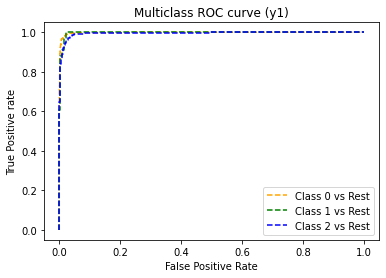

In [14]:
# Grafica la curva ROC para algunas caracteristicas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import norm
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

pred = model.predict(x1_test)
pred_prob = model.predict_proba(x1_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y1_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve (y1)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass_ROC_RandonForest (y1)',dpi=300);  

**y2:** Datos del tipo de ADN

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

model = RandomForestClassifier(max_depth=14, random_state=0)
model.fit(x2_train, y2_train)

model.score(x2_test, y2_test)

0.985418265541059

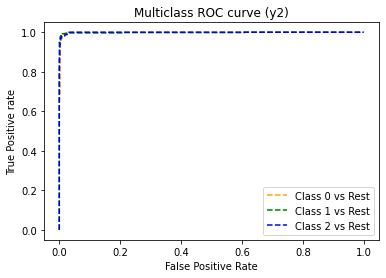

In [16]:
# Grafica curva ROC por caracteristicas
pred = model.predict(x2_test)
pred_prob = model.predict_proba(x2_test)

fpr = {}
tpr = {}
thresh ={}
n_class = 3
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y2_test, pred_prob[:,i], pos_label=i)

# plot   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve (y2)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass_ROC_RandonForest (y2)',dpi=300);  

## Modelo N° 2: KNeighborsClassifier
**y1:** Datos del Reyno animal

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
# -----------------------------------------------
scaler = StandardScaler()
scaler.fit(x1_train)
xs1_train = scaler.transform(x1_train)
xs1_test = scaler.transform(x1_test)
# -----------------------------------------------
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(xs1_train, y1_train)
model_knn.score(xs1_test, y1_test)

0.9366845740598618

In [18]:
# Resultados de algunas pruebas con n_neighbors
# nn=1: 0.9393706830391404
# nn=2: 0.9332310053722179
# nn=3: 0.9366845740598618
# nn=4: 0.9359171143514965
# nn=5: 0.9278587874136608
# nn=6: 0.9293937068303914
# nn=7: 0.9274750575594781

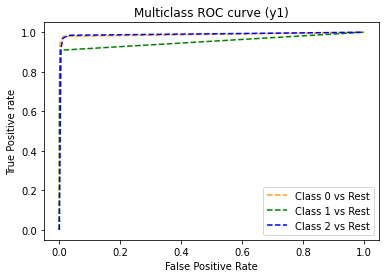

In [19]:
pred = model_knn.predict(xs1_test)
pred_prob = model_knn.predict_proba(xs1_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y1_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve (y1)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass_ROC_Kneiboard (y1)',dpi=300);  

**y2:** Datos del tipo de ADN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
# -----------------------------------------------
scaler = StandardScaler()
scaler.fit(x2_train)
xs2_train = scaler.transform(x2_train)
xs2_test = scaler.transform(x2_test)
# -----------------------------------------------
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(xs2_train, y2_train)
model_knn.score(xs2_test, y2_test)

0.9927091327705295

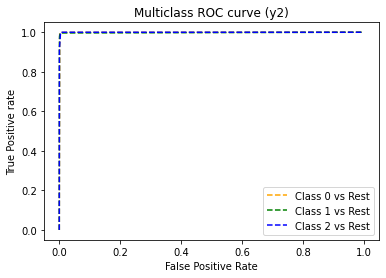

In [21]:
pred = model_knn.predict(xs2_test)
pred_prob = model_knn.predict_proba(xs2_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y2_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve (y2)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass_ROC_Kneiboard (y2)',dpi=300); 